In [41]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

In [42]:
diamonds_df = pd.read_csv("noisy_datasets/diamond.csv")
print("\nDiamond Data \n", diamonds_df.describe())


Diamond Data 
        average us salary  number of diamonds mined (millions)
count       53940.000000                         53940.000000
mean        39521.990100                             2.902669
std          5486.892971                             1.325985
min         30000.000000                             0.600000
25%         34780.000000                             1.750000
50%         39547.500000                             2.910000
75%         44252.000000                             4.050000
max         48999.000000                             5.200000


In [43]:
print("Shape of diamonds dataset before dropping na values: ",diamonds_df.shape)
diamonds_df = diamonds_df.dropna()
print("Shape of diamonds dataset after dropping na values: ",diamonds_df.shape)

Shape of diamonds dataset before dropping na values:  (53940, 13)
Shape of diamonds dataset after dropping na values:  (49075, 13)


In [44]:
# Converting the string values in numerical columns to NA and dropping the rows
num_cols = ['Unnamed: 0', 'carat', 'average us salary', 'number of diamonds mined (millions)', 'depth',	'table', 'price', 'x', 'y', 'z']
for cols in num_cols:
    diamonds_df[cols] = pd.to_numeric(diamonds_df[cols], errors = 'coerce')
diamonds_df = diamonds_df.dropna()
print("Shape of diamonds dataset after dropping na values: ",diamonds_df.shape)

Shape of diamonds dataset after dropping na values:  (48822, 13)


In [45]:
print(diamonds_df.isnull().sum())
# No missing values in the dataset is found
string_cols = []
for cols in diamonds_df.columns:
    if diamonds_df[cols].dtype == 'object':
        string_cols.append(cols)
# Converting values of all columns with object datatype to lowercase
diamonds_df[string_cols] = diamonds_df[string_cols].apply(lambda x: x.str.lower())
diamonds_df

Unnamed: 0                             0
carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64


,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1.0,0.23,ideal,e,si2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,2.0,0.21,premium,e,si1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,good,e,vs1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,4.0,0.29,premium,i,vs2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,5.0,0.31,good,j,si2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936.0,0.72,ideal,d,si1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53937.0,0.72,good,d,si1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53938.0,0.70,very good,d,si1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53939.0,0.86,premium,h,si2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


In [46]:
# detecting outliers and replacing them with the median of the column
diamond_df_cols = ['carat', 'average us salary', 'number of diamonds mined (millions)', 'depth', 'table', 
       'price', 'x', 'y', 'z']

for cols in diamond_df_cols:
    if diamonds_df[cols].dtype != 'object':
        q1 = diamonds_df[cols].quantile(0.25)
        q3 = diamonds_df[cols].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5*iqr
        ub = q3 + 1.5*iqr
        outliers = diamonds_df[(diamonds_df[cols] < lb) | (diamonds_df[cols] > ub)]
        print(f"Outliers of Column {cols}: ", outliers)
        if not outliers.empty:
            median1 = diamonds_df[cols].median()
            diamonds_df[cols] = diamonds_df[cols].apply(lambda x: median1 if (x < lb or x > ub) else x)
print('Diamonds datset after replacing outliers with median values: ', diamonds_df.head(10))

Outliers of Column carat:         Unnamed: 0  carat      cut color clarity  average us salary  \
12246     12247.0   2.06  premium     j      i1              40497   
13002     13003.0   2.14     fair     j      i1              31965   
13118     13119.0   2.15     fair     j      i1              42063   
13757     13758.0   2.22     fair     j      i1              46284   
13991     13992.0   2.01     fair     i      i1              46942   
...           ...    ...      ...   ...     ...                ...   
27741     27742.0   2.15    ideal     g     si2              31876   
27742     27743.0   2.04  premium     h     si1              32337   
27744     27745.0   2.29  premium     i     si1              44106   
27746     27747.0   2.07    ideal     g     si2              38530   
27749     27750.0   2.29  premium     i     vs2              39679   

       number of diamonds mined (millions)  depth  table    price     x     y  \
12246                                 0.90   61.2  

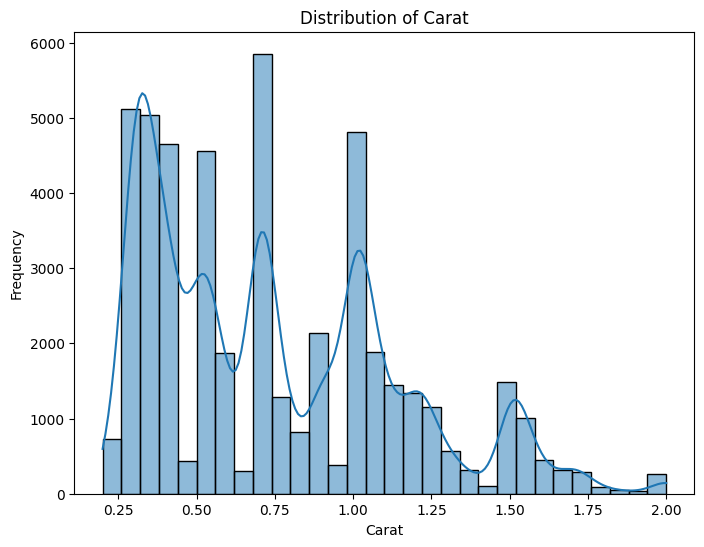

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(diamonds_df['carat'], bins=30, kde=True)
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

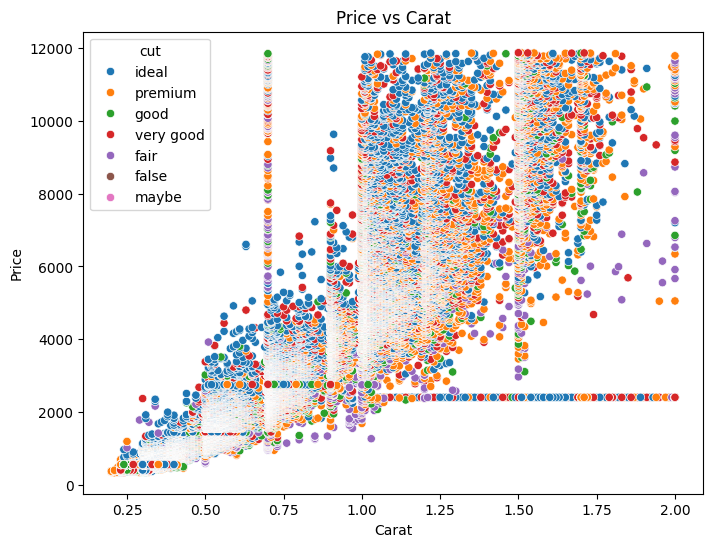

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=diamonds_df, x='carat', y='price', hue='cut')
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

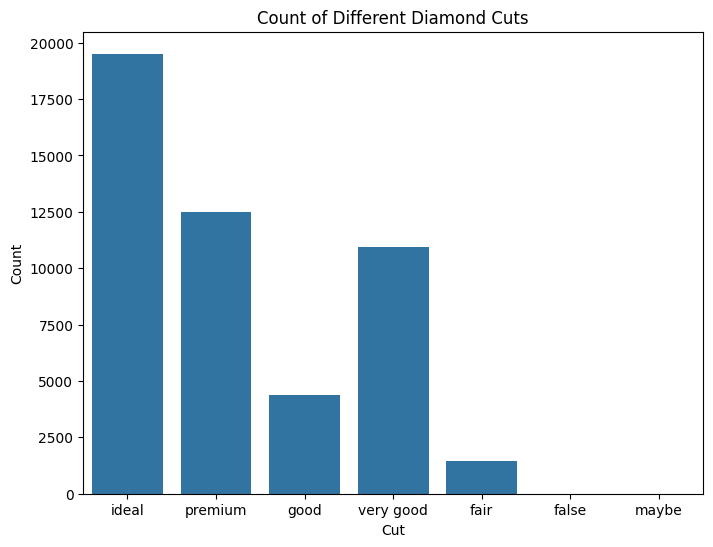

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=diamonds_df, x='cut')
plt.title('Count of Different Diamond Cuts')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

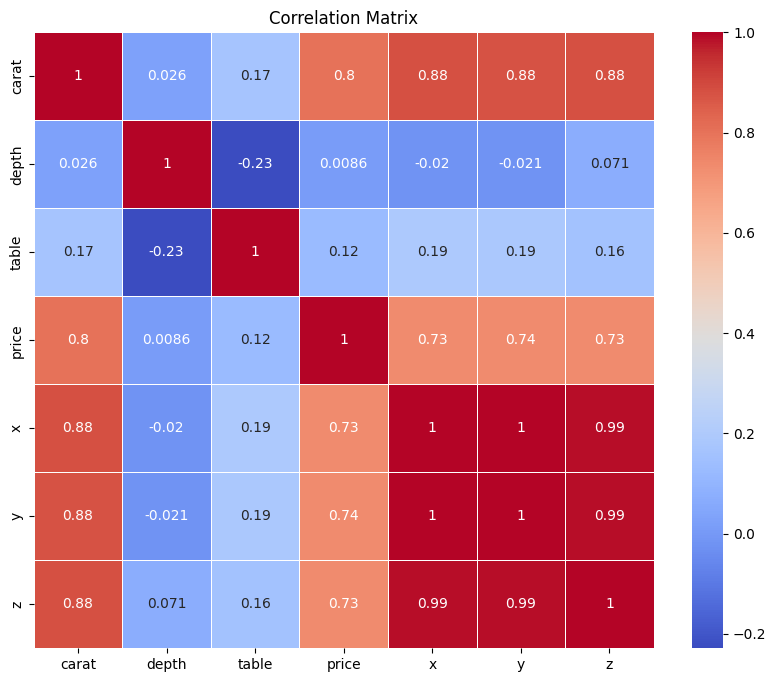

In [50]:
plt.figure(figsize=(10, 8))
corr_matrix = diamonds_df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

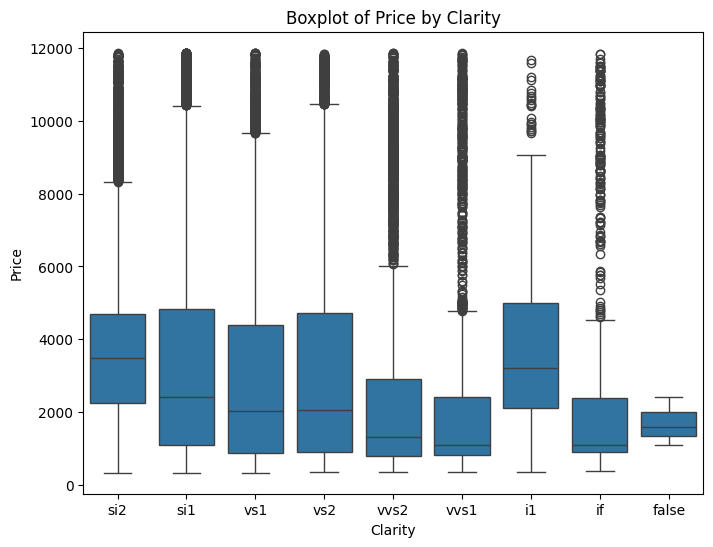

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=diamonds_df, x='clarity', y='price')
plt.title('Boxplot of Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

In [52]:
price_correlations = corr_matrix['price'].sort_values(ascending=False)
print("Correlations of features with price:")
print(price_correlations)

threshold = 0.1
low_correlation_features = price_correlations[price_correlations.abs() < threshold].index.tolist()
print(f"Features with low correlation with price: {low_correlation_features}")
diamonds_df = diamonds_df.drop(columns=low_correlation_features)


Correlations of features with price:
price    1.000000
carat    0.799856
y        0.735267
x        0.734362
z        0.732352
table    0.123618
depth    0.008594
Name: price, dtype: float64
Features with low correlation with price: ['depth']
